## Aplicação de PanTompkins

Esse notebook tem a finalidade de ler uma dataframe com leituras ECG e separa-las em amostras de batimentos usando o algoritmo de Pantompkins

In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../')

In [2]:
from pacote import pantompkins

In [3]:
df = pd.read_csv('../datasets/426783006_lead_0.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])

## TODO: Deixar a frequencia na tabela

In [5]:
columns = df.columns
df

,0,1,2,3,4,5,6,7,8,9,...,4993,4994,4995,4996,4997,4998,4999,arritmia,leads,arquivo
0,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.099,-0.104,-0.102,-0.093,...,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,426783006,0,HR13504
1,-0.220,-0.220,-0.220,-0.220,-0.221,-0.220,-0.201,-0.181,-0.171,-0.152,...,0.005,0.005,0.005,0.005,0.005,0.005,0.005,426783006,0,HR21191
2,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.036,-0.033,-0.044,-0.055,...,-0.090,-0.090,-0.090,-0.090,-0.090,-0.090,-0.090,426783006,0,HR18986
3,-0.240,-0.240,-0.240,-0.240,-0.241,-0.240,-0.228,-0.220,-0.221,-0.227,...,0.075,0.075,0.075,0.075,0.075,0.075,0.075,426783006,0,HR06445
4,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,-0.063,-0.065,-0.067,-0.071,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,426783006,0,HR13100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.085,-0.085,-0.085,-0.085,-0.085,-0.085,-0.093,-0.098,-0.102,-0.105,...,0.050,0.050,0.050,0.050,0.050,0.050,0.050,426783006,0,HR19209
296,0.020,0.020,0.020,0.020,0.021,0.020,0.005,-0.015,-0.019,-0.025,...,-0.130,-0.130,-0.130,-0.130,-0.130,-0.130,-0.130,426783006,0,HR14750
297,0.025,0.025,0.025,0.025,0.025,0.025,0.017,0.012,0.007,0.005,...,0.010,0.010,0.010,0.010,0.010,0.010,0.010,426783006,0,HR04220
298,-0.029,-0.044,-0.049,-0.054,-0.063,-0.059,-0.034,-0.044,-0.059,-0.039,...,0.078,0.044,-0.024,-0.059,-0.156,-0.020,0.078,426783006,0,JS11558


In [6]:
pico = pantompkins.peaks(df.iloc[0][columns[:-3]],500)

In [7]:
pico[0]

array([ 461,  683, 1408, 1915, 2428, 2945, 3444, 3680, 4420, 4945])

In [8]:
data_beat = pd.DataFrame()
for x in range(len(df)):
    data_beat = data_beat.append(pantompkins.batimentos(
        df.iloc[x][columns[:-3]],
        df.iloc[x][columns[-3]],
        500,
        df.iloc[x][columns[-2]]))

In [9]:
data_beat

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
0,-0.040,-0.040,-0.038,-0.035,-0.035,-0.035,-0.035,-0.033,-0.029,-0.030,...,0.074,0.070,0.070,0.070,0.072,0.076,0.075,0.071,426783006.0,0.0
1,0.576,0.490,0.410,0.306,0.212,0.129,0.069,0.055,0.062,0.037,...,0.045,0.048,0.050,0.050,0.050,0.046,0.044,0.045,426783006.0,0.0
2,0.002,0.005,0.005,0.009,0.011,0.008,0.005,0.005,0.005,0.002,...,0.081,0.078,0.071,0.064,0.060,0.056,0.054,0.056,426783006.0,0.0
3,-0.050,-0.050,-0.053,-0.055,-0.056,-0.060,-0.060,-0.060,-0.060,-0.061,...,0.062,0.060,0.060,0.052,0.043,0.038,0.033,0.025,426783006.0,0.0
4,-0.065,-0.065,-0.065,-0.065,-0.066,-0.063,-0.060,-0.060,-0.060,-0.060,...,0.101,0.100,0.100,0.100,0.100,0.092,0.086,0.084,426783006.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,-0.005,-0.008,-0.011,-0.009,-0.005,-0.005,-0.001,-0.001,-0.006,-0.015,...,-0.084,-0.075,-0.118,-0.115,-0.092,-0.082,-0.065,-0.057,426783006.0,0.0
4,-0.055,-0.069,-0.095,-0.091,-0.085,-0.120,-0.110,-0.097,-0.091,-0.083,...,-0.012,-0.044,-0.070,-0.056,-0.036,-0.028,-0.031,-0.035,426783006.0,0.0
5,-0.101,-0.085,-0.077,-0.064,-0.048,-0.038,-0.025,0.000,-0.027,-0.048,...,0.072,0.081,0.081,0.085,0.059,0.027,0.006,-0.009,426783006.0,0.0
6,0.001,-0.005,0.018,0.041,0.058,0.056,0.030,0.009,0.000,0.035,...,0.017,-0.009,-0.046,-0.085,-0.084,-0.068,-0.052,-0.037,426783006.0,0.0


In [10]:
import matplotlib.pyplot as plt

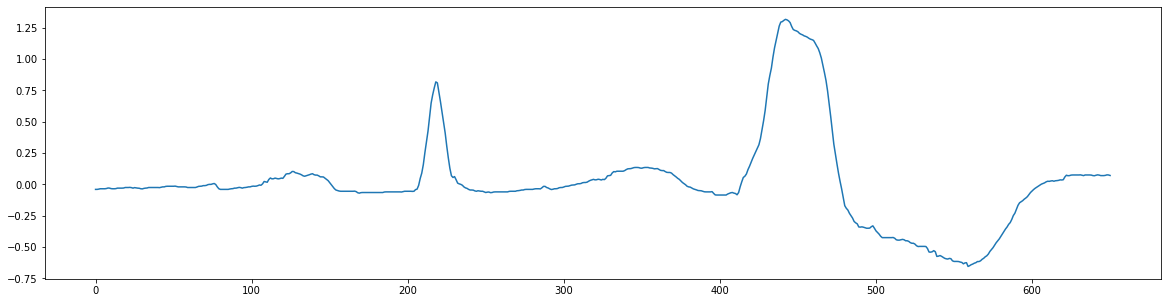

In [11]:
plt.figure(figsize=(20,5))
plt.plot(np.linspace(0,650,651),data_beat.iloc[0][data_beat.columns[:-2]])

In [12]:
data_beat.to_csv('data_beat_'+str(df.iloc[0][columns[-3]])+'.csv')